<h1 style="text-align: center">
<div style="color: #DD3403; font-size: 60%">Data Science DISCOVERY MicroProject</div>
<span style="">MicroProject #8: FIFA Matches since 1872</span>
<div style="font-size: 60%;"><a href="https://discovery.cs.illinois.edu/microproject/fifa-world-cup/">https://discovery.cs.illinois.edu/microproject/fifa-world-cup/</a></div>
</h1>

<hr style="color: #DD3403;">

## Data Source: FIFA International Soccer Match Data via GitHub

The Fédération Internationale de Football Association, or simply FIFA, is the largest governing organization of international football (soccer) competition, including the FIFA World Cup that occurs once every four years.  The FIFA World Cup is likely the most popular sporting event in the world, drawing billions of viewers every tournament.

Mart Jürisoo (@martj42) maintains the [@martj42/international_results](https://github.com/martj42/international_results) GitHub repository that has collected over 45,000 *"results of international football matches starting from the very first official match in 1872 [...]"*.

> *The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.*

In this MicroProject, you will find how to collect the raw URL for a GitHub-hosted dataset, group data using different variable on the dataset, and create visualizations highlighting over 150 years of FIFA matches!  Let's nerd out! 🎉

### Background Knowledge

To finish this MicroProject, we assume you already know:

- All topics covered in *DISCOVERY Module 1: Basics of Data Science with Python* ([review the module here](https://discovery.cs.illinois.edu/learn/))
- Grouping data in Python ([reviewing grouping data in Python](https://discovery.cs.illinois.edu/learn/Exploratory-Data-Analysis/Grouping-Data-in-Python/))
- Adding new rows and columns into an existing DataFrame ([review creating new columns here](https://discovery.cs.illinois.edu/guides/Modifying-DataFrames/adding-columns-in-dataframes/))

Let's get started! :)

<hr style="color: #DD3403;">

## Part 1: Importing the FIFA Matches from GitHub

When a CSV file is hosted on a public GitHub repository, you can import the dataset directly into your notebook by using the **raw**-format URL.  The "raw file" includes only the file's content, without anything added by GitHub.  To find the raw file URL:

1. Visit the `@martj42/international_results` here: [https://github.com/martj42/international_results](https://github.com/martj42/international_results).
2. Click the `results.csv` file.
3. Click the `Raw` view on the top-right of the Github file viewer.
4. Finally, use the URL of the page showing the raw CSV file as the URL for the dataset you're loading into the DataFrame named `df`.

In the following cell, import the dataset as a DataFrame into the Python variable named `df` by using the raw URL from GitHub:

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/martj42/international_results/refs/heads/master/results.csv"
df = pd.read_csv(url)
df

### Data Cleaning: Remove Incomplete Data

The DataFrame you imported comes from a **continuously-updated repository** that has been updated over 200 times and contains over 45,000 FIFA matches.  If a FIFA match was played yesterday, it may already be in the dataset!  Occasionally, this dataset may contain incomplete rows of data that pandas represents as `NaN` or "Not a Number".

In this MicroProject, we will focus on all the games that we have complete data.  To remove any incomplete rows, use `df = df.dropna()` to update `df` to a DataFrame that has dropped any rows with incomplete data.  Update your dataset below:

In [ ]:
df = df.dropna()
df

### Organizing Data: Adding Columns `year`

In the DataFrame, a `date` column provides an ISO-formatted date string.  However, it will be useful to also have a column containing only the year.

Run the following code to create a new column called `year`, which contains the first four characters of the `date` string as a numeric value (ex: `"1872-11-30"` is recorded as the numeric year `1872`):

In [ ]:
df["year"] = df["date"].str[0:4].astype(int)
df

In [ ]:
### TEST CASE for Part 1: Importing the FIFA Matches from GitHub
tada = "\N{PARTY POPPER}"
assert("df" in vars()), "You must have a Python variable named `df`."
assert(df.isna().sum().sum() == 0), "Your DataFrame `df` must not contain any rows with missing data."
assert("home_team" in df), "Your DataFrame `df` does not appear to the the correct DataFrame?"
assert("year" in df), "Your DataFrame `df` must contain the column `year`."
print(f"{tada} All Tests Passed! {tada}") 

<hr style="color: #DD3403;">

## Part 2: Calculating the Total Number of Goals Scored for Every Country

In an international FIFA match, teams representing two countries play a game of football (soccer) where a few points are usually stored.  The dataset organizes the score of the match with columns `home_team` and `home_score` for the "home team" and `away_team` and `away_score` for the "away (visiting) team".

Each observation in our dataset is a single game.  The first bit of exploratory data analysis (EDA) that would be interesting is to find the **total number of goals scored** by each country.  To do this, we'll need to:
- Find the number of goals scored by each country as the "home team",
- Find the number of goals scored by each country as the "away team", and
- Merge the two DataFrames together to combine the goals they scored while "home" or "away".


### Part 2.1: Finding the Goals Scored for each "Home Team"

Create a new DataFrame named `df_home` that summarizes the entire DataFrame by each unique `home_team` and calculating the total number of home goals for each country.  *It is very useful to use `numeric_only=True` to make sure you sum only the numeric columns.*

*(See the DISCOVERY lecture ["Grouping Data in Python"](https://discovery.cs.illinois.edu/learn/Exploratory-Data-Analysis/Grouping-Data-in-Python/) for a refresher on how to group data.)*

In [ ]:
df_home = df.groupby("home_team").agg("sum", numeric_only=True).reset_index()
df_home

In `df_home`, the values for any column except the country (`home_team`) and score (`home_score`) are meaningless.  Remove any extra columns to ensure your DataFrame contains only the country and score:

*(See the DISCOVERY guide ["Removing Columns in a DataFrame"](https://discovery.cs.illinois.edu/guides/Modifying-DataFrames/removing-columns-from-dataframes/) for a refresher on how to remove columns from a DataFrame.)*

In [ ]:
# Remove all unnecessary columns:
df_home = df_home[["home_team", "home_score"]]

df_home

In [ ]:
### TEST CASE for Part 2.1: Finding the Goals Scored for each "Home Team"
tada = "\N{PARTY POPPER}"
assert("df_home" in vars()), "You must define a Python variable `df_home`"
assert(type(df_home) == type(pd.DataFrame())), "The variable `df_home` must be a DataFrame."
assert(len(df_home) == len(df["home_team"].unique())), "The DataFrame `df_home` must have exactly one row for each home country."
assert("home_score" in df_home), "The DataFrame `df_home` must have a `home_score` column."
assert("home_team" in df_home), "The DataFrame `df_home` must have a `home_team` column (not as an index). Make sure to use .reset_index()!"
assert( len(df_home.columns) == 2 ), "Your DataFrame `df_home` must have exactly two columns."
for _df in [df_home.head(1), df_home[df_home["home_score"] == df_home["home_score"].max()] ]:
  __ = _df["home_team"].values[0]
  assert( df[ df["home_team"] == __ ]["home_score"].sum() == _df["home_score"].values[0] ), f'The value of `home_score` in the DataFrame `df_home` must be the sum of all `home_score` records for each country. In your `df_home`, "{__}" has the value {_df["home_score"].values[0]} but "{__}" has scored {df[ df["home_team"] == __ ]["home_score"].sum()} goals in the full dataset `df`.'
print(f"{tada} All Tests Passed! {tada}") 

### Part 2.2: Finding the Goals Scored for each "Away Team"

How about for away goals?  Do the same thing as you did in 2.1, but for `away_team` and `away_score`.  Call this DataFrame `df_away`:

In [ ]:
df_away = df.groupby("away_team")["away_score"].agg("sum", numeric_only=True).reset_index()
df_away

Similar to what you did above, ensure sure you only have data for the columns about the country (`away_team`) and score (`away_score`). Remove any extra columns to ensure your DataFrame contains only the country and score:

In [ ]:
# Remove all unnecessary columns:

df_away

In [ ]:
### TEST CASE for Part 2.2: Finding the Goals Scored for each "Away Team"
tada = "\N{PARTY POPPER}"
assert("df_away" in vars()), "You must define a Python variable `df_away`"
assert(type(df_away) == type(pd.DataFrame())), "The variable `df_away` must be a DataFrame."
assert(len(df_away) == len(df["away_team"].unique())), "The DataFrame `df_away` must have exactly one row for each away country."
assert("away_score" in df_away), "The DataFrame `df_away` must have a `away_score` column."
assert("away_team" in df_away), "The DataFrame `df_away` must have a `away_team` column (not as an index). Make sure to use .reset_index()!"
assert( len(df_away.columns) == 2 ), "Your DataFrame `df_away` must have exactly two columns."
_ = df_away.head(1)
if "away_team" in _: __ = _["away_team"].values[0]
else: __ = _.index.values[0]
assert( df[ df["away_team"] == __ ]["away_score"].sum() == _["away_score"].values[0] ), f'The value of `away_score` in the DataFrame `df_away` must be the sum of all `away_score` records for each country. In your `df_away`, "{__}" has the value {_["away_score"].values[0]} but "{__}" has scored {df[ df["away_team"] == __ ]["away_score"].sum()} goals in the full dataset `df`.'
_ = df_away[ df_away["away_score"] == df_away["away_score"].max() ]
if "away_team" in _: __ = _["away_team"].values[0]
else: __ = _.index.values[0]
assert( df[ df["away_team"] == __ ]["away_score"].sum() == df_away["away_score"].max() ), f'The value of `away_score` in the DataFrame `df_away` must be the sum of all `away_score` records for each country. In your `df_away`, "{__}" has the value {_["away_score"].values[0]} but "{__}" has scored {df[ df["away_team"] == __ ]["away_score"].sum()} goals in the full dataset `df`.'
print(f"{tada} All Tests Passed! {tada}")

### Part 2.3: Setting Up the DataFrames To Merge

To merge two DataFrames together, the simplest technique is to **set up two DataFrames where one column has an identical name in both DataFrames**.  Currently, in your DataFrame `df_home`, each country is in the column name `home_team`; in `df_away`, each country is in `away_team`.

To rename a column in a DataFrame, the `rename()` function allows you to specify the old and new column names in a Python dictionary.  Specifically, the syntax to rename the `home_team` column to `team` is:
> ```py
> df_home = df_home.rename(columns = {"home_team": "team"})
> #                                    ^^^^^^^^^    ^^^^
> #                           (old column name)^    ^(new column name)
> ```

Using `df_home.rename(...)`, rename your `home_team` column to `team`:

In [ ]:
# Rename the `home_team` column to `team`:
df_home = df_home.rename(columns = {"home_team" : "team"})

df_home

Repeat the process for `df_away`, making sure `away_team` is renamed to `team`: 

In [ ]:
# Rename the `away_team` column to `team`:
df_away = df_away.rename(columns = {"away_team" : "team"})

df_away

### Part 2.4: Merge Two DataFrames Into One!

You're all set up to merge two DataFrames together!  You have two DataFrames which have **exactly one column** with an identical name -- both `df_home` and `df_away` have the column named `team`.

Read the DISCOVERY guide ["Combining DataFrames by Merging"](https://discovery.cs.illinois.edu/guides/Combining-DataFrames/Combining-DataFrames-by-Merging/) to learn how to merge two DataFrames together using `pd.merge` and create a merged DataFrame called `df_scores`.
- A few countries have never played a home game, and a few other countries have never played an away game!  This means that some teams do not exist in both `df_home` and `df_away`!
- Make certain to **keep all unmatched rows** by reading the "Keeping Unmatched Rows" section in the guide linked above!

In [ ]:
df_scores = pd.merge(df_home, df_away, on='team', how='outer')
df_scores

In [ ]:
### TEST CASE for Part 2.4: Merge Two DataFrames Into One
tada = "\N{PARTY POPPER}"
assert("team" in df_home), "Your DataFrame `df_home` must contain a column named \"team\"."
assert("team" in df_away), "Your DataFrame `df_away` must contain a column named \"team\"."
assert("df_scores" in vars()), "You must define a Python variable `df_scores`"
for col in ["team", "home_score", "away_score"]: assert(col in df_scores), f"Your DataFrame `df_scores` must have the column named {col}."
assert(len(df_scores) == len(set( df_home["team"].unique().tolist() + df_away["team"].unique().tolist() ))), "Your merged DataFrame must have every team who has played ANY games (make sure to \"Keep Unmatched Rows\", which is a section in the linked guide)"
print(f"{tada} All Tests Passed! {tada}")

### Part 2.5: Fixing Missing Data

When merging your DataFrames using an "outer" join, some teams will have only played home games while other teams will have only played away games.  Let's look at cells that do not have either a `home_score` or an `away_score`:

In [ ]:
# Shows all rows with at least one missing value:
df_scores[ ~df_scores.index.isin(df_scores.dropna().index.values) ]

As a data scientist, we have to make a decision each time we see missing data on how to best handle missing data in each dataset:
1. Many times, missing data occurs when an observation is not collected and should be left as missing data.  Python will skip over missing data when calculating statistics like the `mean()`, `sum()`, `std()`, etc.
2. Other times, missing data indicates that there is no data.  In cases where we're certain of this, we can replace the missing `NaN` markers with the correct numeric value indicating there's no data (ex: `0`).
1. Finally, some times missing data indicates a problem with the data, and the data can be excluded from the analysis as an incomplete record.

In our example, we know missing data appears in `df_scores` when a team has never played either a home or an away game.  The correct value for these cells is that missing cells indicate that zero points have been scored.  The DataFrame function `fillna(...)` will fill all rows with missing data with the `value` you specify.  For example:

>```py
> # Fills all missing values in the DataFrame `df` with the value 100.
> df = df.fillna(100)
> df
>```

Update your `df_scores` DataFrame and fill in all missing values with the number `0` to indicate that they have scored zero points in either home or away games:

In [ ]:
# Update `df_scores` DataFrame to fill in all missing values:
df_scores['home_score'] = df_scores['home_score'].fillna(0)
df_scores['away_score'] = df_scores['away_score'].fillna(0)

In [ ]:
### TEST CASE for Part 2.5: Fixing Missing Data
tada = "\N{PARTY POPPER}"
assert(len(df_scores[ ~df_scores.index.isin(df_scores.dropna().index.values) ]) == 0), "You must have zero rows in your DataFrame `df_scores` with missing data values (NaN)."
assert(len(df_scores) == len(set( df_home["team"].unique().tolist() + df_away["team"].unique().tolist() ))), "Your merged DataFrame must have every team who has played any games (are you sure you're doing an outer join?)"
assert(len(df_scores[ (df_scores.home_score == 0) ]) > 10), "Your must replace your missing rows with the score of 0."
assert(len(df_scores[ (df_scores.away_score == 0) ]) > 10), "Your must replace your missing rows with the score of 0."
print(f"{tada} All Tests Passed! {tada}")

### Part 2.6: Creating a Data Visualization

Let's discover what country scored the most goals across across the 45,000 FIFA matches!  First, we'll want to organize the dataset by the total number of goals.  Add a new column to your DataFrame `df_scores` called `total_score` that adds up the `home_score` and `away_score` for each team:

In [53]:
df_scores["total_score"] = df_scores["home_score"] + df_scores["away_score"]
df_scores


,team,home_score,away_score,total_score
0,Abkhazia,39.0,12.0,51.0
1,Afghanistan,55.0,85.0,140.0
2,Albania,234.0,133.0,367.0
3,Alderney,20.0,53.0,73.0
4,Algeria,639.0,261.0,900.0
...,...,...,...,...
327,Yugoslavia,439.0,504.0,943.0
328,Zambia,625.0,601.0,1226.0
329,Zanzibar,67.0,124.0,191.0
330,Zimbabwe,322.0,324.0,646.0


Using `df_scores`, create a **stacked bar chart that stacks the values of home_score and away_score on top of each other.**  To do this, use `df_scores.plot.bar(...)` with the following function options:
- The parameter `x` sets the column of data to use for the x-axis data; set `x` to be the column name that contains the name of each country,
- The parameter `y` sets the **list** of columns to use for y-axis data; set `y` equal to the **list** `["home_score", "away_score"]`.
- The parameter `stacked` must be set to `True` to indicate a **stacked bar chart** (`stacked=True`).
- The parameter `title` set to an informative title (ex: `"Total Points Scored in FIFA International Matches"`), or similar.

In the cell below, set your visualization equal to `ax` so we can also access it in the test case:

<Axes: title={'center': 'Total Goals Scored in FIFA International Matches'}, xlabel='team'>

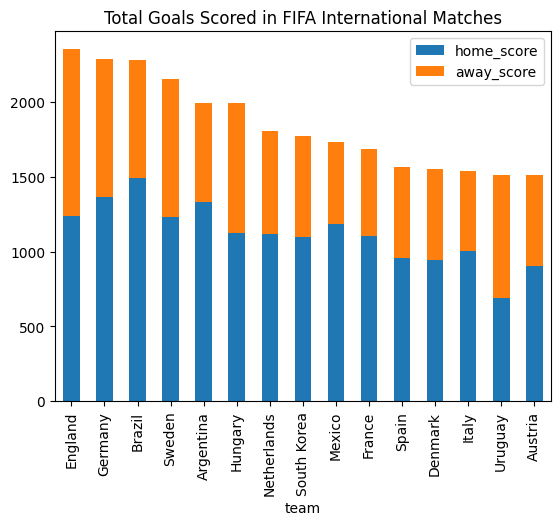

In [61]:
ax = df_scores.nlargest(15, "total_score").plot.bar(x='team', y=["home_score", "away_score"], stacked=True, title="Total Goals Scored in FIFA International Matches")
ax

#### Visualization Updates

That's a lot of teams!!

Modify your code above to display only the top 15 teams based on the value in `total_score`.  This can be done by adding `nlargest(15,"total_score")` into your line of visualization code above.  For example:

> ```py
> # Full Dataset
> df_scores.plot.bar( ... )
>
> # Largest Rows
> df_scores.nlargest(15, "total_score").plot.bar( ... )
> #         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
> ```

Update your visualization in your code cell above! :)

In [62]:
### Part 2.6: Creating a Data Visualization
tada = "\N{PARTY POPPER}"
assert( "total_score" in df_scores ), "Your DataFrame `df_scores` must have the column `total_scores`."
assert(len(ax.get_xticklabels()) == 15), "You must have exactly 15 teams in your data visualization."
assert(ax.get_xticklabels()[0].get_text() == df_scores.nlargest(1, "total_score")["team"].values[0]), "The first team on your visualization must be the team that has scored the highest number of total points."
assert( ax.get_yticks()[-1] > 2000 ), "You must create a stacked bar chart. It appears your data is incorrect, or not a stacked bar chart."
assert(len(ax.title.get_text()) > 10), "You must provide a descriptive title for your graph."
print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


### Analysis

With this data visualization, there's several interesting questions we can ask answer about over 45,000 FIFA games:
- What team scored the most points overall? England
- Did that team also score the most points at home, or did a different team do better in their home games? No
- Most teams seem to score more points at home than away. Is there any team that scored more points at away games than home games? Uruguay

<hr style="color: #DD3403;">

## Part 3: FIFA World Cup

Returning to the full dataset `df` that contains one observation for each match played, the `tournament` column in `df` provides the tournament where the game was played.

World Cup games were the only international matches played on Nov. 30, 2022 (`2022-11-30`).  Find the `tournament` string used for games during the World Cup by looking at games with that `date` during the World Cup:

In [66]:
df[df["date"] == "2022-11-30"]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
45730,2022-11-30,Poland,Argentina,0,2,FIFA World Cup,Doha,Qatar,True,2022
45731,2022-11-30,Saudi Arabia,Mexico,1,2,FIFA World Cup,Lusail,Qatar,True,2022
45732,2022-11-30,Australia,Denmark,1,0,FIFA World Cup,Al Wakrah,Qatar,True,2022
45733,2022-11-30,Tunisia,France,1,0,FIFA World Cup,Al Rayyan,Qatar,True,2022


### Part 3.1: Finding World Cup Games

Take note of the label used for World Cup games in this dataset. Now knowing how the World Cup games are labeled, create a new DataFrame `df_worldcup` that contains all World Cup games played in the dataset:

In [67]:
df_worldcup = df[df["tournament"] == "FIFA World Cup"]
df_worldcup

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
1493,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930
1494,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930
1495,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930
1496,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930
1497,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930
...,...,...,...,...,...,...,...,...,...,...
45754,2022-12-10,England,France,1,2,FIFA World Cup,Al Khor,Qatar,True,2022
45756,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,Lusail,Qatar,True,2022
45757,2022-12-14,France,Morocco,2,0,FIFA World Cup,Al Khor,Qatar,True,2022
45761,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True,2022


In [68]:
### TEST CASE for Part 3.1: World Cup Games
tada = "\N{PARTY POPPER}"
assert("df_worldcup" in vars()), "Make sure your dataframe with only World Cup games is named `df_worldcup`."
assert(len(df_worldcup) > 960), "Ensure that `df_worldcup` only has rows that represent World Cup games."
assert(len(df_worldcup["tournament"].unique()) == 1), "Ensure that `df_worldcup` only has rows that represent World Cup games."
assert("World Cup" in df_worldcup["tournament"].unique()[0]), "Ensure that `df_worldcup` only has rows that represent World Cup games."
print(f"{tada} All Tests Passed! {tada}") 

🎉 All Tests Passed! 🎉


### Part 3.2: Grouping Data by Year

Create a summary of all the World Cup games that calculates the **average `home_score` and `away_score` each year** and store this DataFrame in a variable called `df_worldcup_years`.

*(See the DISCOVERY lecture ["Grouping Data in Python"](https://discovery.cs.illinois.edu/learn/Exploratory-Data-Analysis/Grouping-Data-in-Python/) for a refresher on how to group data.)*

In [76]:
df_worldcup

df_worldcup_years = df_worldcup.groupby('year')[['home_score', 'away_score']].mean().reset_index()
df_worldcup_years


,year,home_score,away_score
0,1930,2.277778,1.611111
1,1934,2.235294,1.882353
2,1938,2.555556,2.111111
3,1950,1.954545,2.045455
4,1954,2.730769,2.653846
5,1958,2.000000,1.600000
6,1962,1.406250,1.375000
7,1966,1.437500,1.343750
8,1970,1.562500,1.406250
9,1974,1.500000,1.052632


In [77]:
### Part 3.2: Grouping Data by Year
tada = "\N{PARTY POPPER}"
assert("df_worldcup_years" in vars()), "You must define a Python variable named `df_worldcup_years`."
for year in df_worldcup_years["year"].unique(): assert((year + 2) % 4 == 0), f"The `year` {year} is found in your DataFrame `df_worldcup_years` but no World Cup was played in {year}."
assert(df_worldcup_years[ df_worldcup_years.year == 1982 ]["home_score"].values[0] == df[ (df.year == 1982) & (df.tournament.str.len() == 14) & (df.tournament.str.contains("World Cup")) ]["home_score"].mean()), "Your summary must contain the average of the home_score and away_score among all world cup games each year.  Your data has the incorrect mean values.  (Are you sure you found the average?)"
print(f"{tada} All Tests Passed! {tada}")      

🎉 All Tests Passed! 🎉


### Part 3.3: Creating a Multi-Line Data Visualization

Using `df_worldcup_years`, create a **multi-line line chart that graphs both the `home_score` and `away_score` in a single line chart**.  To do this, use `df_worldcup_years.plot.line(...)`.  This is very similar to having two different variables visualized using a bar chart.  Create a graph plot using the following options:
- The parameter `x` sets the column of data to use for the x-axis data; set `x` to be the column name that contains the year,
- The parameter `y` sets the **list** of columns to use for y-axis data; set `y` equal to the **list** `["home_score", "away_score"]`.
- The parameter `title` set to an informative title (ex: `"Average Points Scored in All World Cup Games Each Tournament"`), or similar.

In the cell below, set your visualization equal to `ax` again so we can access it in the test case:

<Axes: title={'center': 'Average Points Scored in All World Cup Games Each Tournament'}, xlabel='year'>

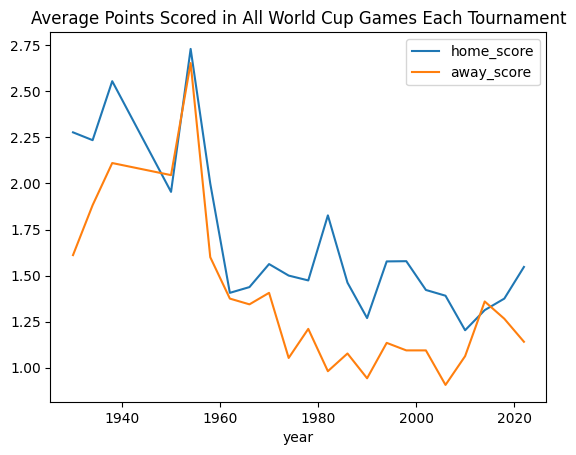

In [78]:
ax = df_worldcup_years.plot.line(x='year', y=["home_score", "away_score"], title="Average Points Scored in All World Cup Games Each Tournament")
ax

In [79]:
### Part 3.3: Creating a Multi-Line Data Visualization
tada = "\N{PARTY POPPER}"
assert(ax.get_yticks()[-1] < 4), "You must NOT have a stacked line chart. It appears your data is your visualization is incorrect."
assert(len(ax.legend().get_texts()) == 2), "Your legend must contain two fields (`home_score` and `away_score`)."
assert(len(ax.title.get_text()) > 10), "You must provide a descriptive title for your graph."
print(f"{tada} All Tests Passed! {tada}")


🎉 All Tests Passed! 🎉


### Analysis

In this visualization, you learned how to plot multiple variables on a single data visualization!  In general, what is the trend of points scored per game in World Cup matches?  (Are matches played today scoring more points, on average, than 80 years ago?)

The amount of goals score, both at home and away, has drastically decreased


*Note that almost every World Cup match is a "Neutral" site game, so the "home_score" and "away_score" do not have much context when looking only at World Cup matches.*

<hr style="color: #DD3403;">

## Submission

You're almost done!  All you need to do is to commit your lab to GitHub and run the GitHub Actions Grader:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and return to https://discovery.cs.illinois.edu/microproject/fifa-world-cup/ and complete the section **"Commit and Grade Your Notebook"**.

3. If you see a 100% grade result on your GitHub Action, you've completed this MicroProject! 🎉